In [ ]:

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import json
import pandas as pd

# Load the JSON data from Google Drive
file_path = '/content/drive/My Drive/tweets_ws23_v1.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Convert to DataFrame
tweets_df = pd.json_normalize(data)

print(tweets_df.columns)


Index(['source_created_at', 'author_id', 'text', 'source', 'language',
       'longitude', 'latitude', 'id', 'labels.topic', 'labels.sentiment',
       'source_id'],
      dtype='object')


In [ ]:
# Display the first few rows of the Tweet DataFramprint( "first few rows of Tweet Dataset: ", tweet_df.head())
print("Shape of the normarlised Tweet Dataset: ", tweets_df.shape)

Shape of the normarlised Tweet Dataset:  (16949, 11)


In [ ]:
print(tweets_df[['labels.topic']].head(1))

                                        labels.topic
0  [{'tweet_id': 'acd7673f-e621-5f1a-d662-df27896...


In [ ]:
topic_df = pd.json_normalize(tweets_df['labels.topic'].explode())
print(topic_df.head())

                               tweet_id   user_id  relevant    topic  \
0  acd7673f-e621-5f1a-d662-df278964a6ea  Z003XDCS      True  service   
1  5b92aba8-4b05-6c63-8485-e9c870742137  Z003XDCS      True   delays   
2  0a799c07-8b76-17ba-b840-e538d51e832d  Z003XDCS      True  toilets   
3  8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14  Z003XDCS      True  toilets   
4  1fd08862-d8c7-0682-6b11-2603fba22d94  Z003XDCS      True    seats   

   ground_truth                                    id  
0          True  8655353b-cc71-1e89-95d5-1c4e6bf200e1  
1          True  8aee5c86-6e93-24d4-6d9d-d8a9f2f19cef  
2          True  2d54f18a-442d-b59b-9daf-0490dc64d21a  
3          True  01db4b72-b21c-60f9-b627-5a47df56655a  
4          True  4fe5177f-8347-1726-c2e9-cc183f16d5b1  


In [ ]:
sentiment_df = pd.json_normalize(tweets_df['labels.sentiment'].explode())
print(sentiment_df.head())

                               tweet_id   user_id sentiment  ground_truth  \
0  acd7673f-e621-5f1a-d662-df278964a6ea  Z003XDCS  negative          True   
1  5b92aba8-4b05-6c63-8485-e9c870742137  Z003XDCS  negative          True   
2  0a799c07-8b76-17ba-b840-e538d51e832d  Z003XDCS  negative          True   
3  8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14  Z003XDCS  negative          True   
4  1fd08862-d8c7-0682-6b11-2603fba22d94  Z003XDCS   neutral          True   

                                     id  
0  5ee4d218-65a9-70a0-0964-a5b00e594a41  
1  2f8d741f-59cf-d1ab-27f9-5537a9718f94  
2  be479c30-17c3-220f-8eae-eaf6fc874431  
3  6df4ba5c-952f-732f-2a7e-4cc6f7d56f61  
4  e5aa618a-c554-6bdb-cb5b-bcdadcaa4e98  


In [ ]:
sentiment_df = sentiment_df.drop(columns=['tweet_id', 'user_id', 'ground_truth', 'id'])

In [ ]:
print(sentiment_df.head())

  sentiment
0  negative
1  negative
2  negative
3  negative
4   neutral


In [ ]:
# Concatenate the DataFrames horizontally (axis=1)
merged_df = pd.concat([tweets_df, topic_df], axis=1)
print(merged_df.columns)
print(merged_df.head())


Index(['source_created_at', 'author_id', 'text', 'source', 'language',
       'longitude', 'latitude', 'id', 'labels.topic', 'labels.sentiment',
       'source_id', 'tweet_id', 'user_id', 'relevant', 'topic', 'ground_truth',
       'id'],
      dtype='object')
            source_created_at           author_id  \
0  2020-09-18 21:56:20.798000           593731316   
1  2020-10-13 07:31:53.122000  745583289520496640   
2  2020-10-26 19:27:24.695000           303134761   
3  2020-10-26 19:28:49.281000           303134761   
4  2020-09-28 11:59:41.212000            56427671   

                                                text    source language  \
0  @DSisourath The Thameslink core between London...  sprinklr       en   
1  @DulwichHistory Loving the complaint about peo...  sprinklr       en   
2  @SW_Help .And yet you have no toilets on some ...  sprinklr       en   
3  @SW_Help you have no toilets on some of your t...  sprinklr       en   
4  @SpeedySticks007 @MrNeilJH @TLRailUK @chri

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16949 entries, 0 to 16948
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   source_created_at  16949 non-null  object 
 1   author_id          16949 non-null  object 
 2   text               16949 non-null  object 
 3   source             16949 non-null  object 
 4   language           16949 non-null  object 
 5   longitude          1425 non-null   float64
 6   latitude           1425 non-null   float64
 7   id                 16949 non-null  object 
 8   labels.topic       16949 non-null  object 
 9   labels.sentiment   16949 non-null  object 
 10  source_id          15548 non-null  object 
 11  tweet_id           16949 non-null  object 
 12  user_id            16949 non-null  object 
 13  relevant           16949 non-null  bool   
 14  topic              16949 non-null  object 
 15  ground_truth       16949 non-null  bool   
 16  id                 169

In [ ]:
# Get indices of rows where topic is 'none'
none_indices = merged_df[merged_df['topic'] == 'none'].index

# Create the 'relevance' column and initialize it to 1
merged_df['relevance'] = 'relevant'

# Set 'relevance' to 0 for rows where topic is 'none'
merged_df.loc[none_indices, 'relevance'] = 'not_relevant'


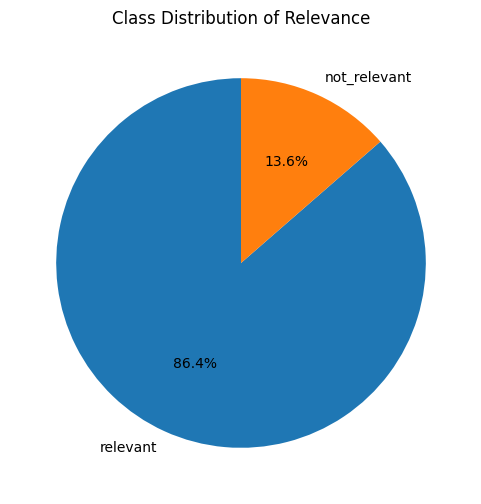

In [ ]:
import matplotlib.pyplot as plt

# Calculate class distribution
relevance_distribution = merged_df['relevance'].value_counts()

# Create pie chart
plt.figure(figsize=(6, 6))  # Adjust figure size as needed
plt.pie(relevance_distribution, labels=relevance_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution of Relevance')
plt.show()

In [ ]:
import pandas as pd

# Assuming merged_df is your DataFrame and 'topic' is the column with topic information

# Get the frequency of each unique topic
topic_counts = merged_df['topic'].value_counts()

# Calculate the percentage of each topic
topic_percentages = (topic_counts / topic_counts.sum()) * 100

# Create a DataFrame for the table
topic_table = pd.DataFrame({'Topic': topic_counts.index, 'Count': topic_counts.values, 'Percentage': topic_percentages.values})

# Display the table
print(topic_table)

                        Topic  Count  Percentage
0                      delays   9023   53.236179
1                        none   2304   13.593722
2                     service    884    5.215647
3                     station    754    4.448640
4                        wifi    620    3.658033
5               train_general    385    2.271520
6                       covid    375    2.212520
7               announcements    315    1.858517
8                       seats    283    1.669715
9                     toilets    282    1.663815
10  tickets/seat_reservations    273    1.610714
11                  vandalism    273    1.610714
12           air conditioning    252    1.486813
13                      doors    197    1.162310
14                     tables    189    1.115110
15                       hvac    172    1.014809
16                      plugs    135    0.796507
17                      noise     77    0.454304
18                    windows     50    0.295003
19                  

# Data preprocessing

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming merged_df is your DataFrame

# Extract features (X) and labels (y)
X = merged_df['text']
y = merged_df['relevance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)  # Adjust test_size and random_state as needed

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (13559,)
Shape of X_test: (3390,)
Shape of y_train: (13559,)
Shape of y_test: (3390,)


In [ ]:
#pip install torch

Data Cleaning

In [ ]:
import re

# Define a regular expression pattern to keep numbers, letters, and specific characters (e.g., '#', '@')
pattern = re.compile('[^a-zA-Z0-9]')  # Adjust the characters within the square brackets as needed

# Clean X_train
X_train = X_train.apply(lambda text: pattern.sub(' ', text))

# Clean X_test
X_test = X_test.apply(lambda text: pattern.sub(' ', text))

In [ ]:
print(X_train.head())

9210      TLRailUK really disappointed with the way you...
9394      TLRailUK the 1716 from elstree to Sutton is d...
15082     TLRailUK Thanks  The 0701 departed at 0704  W...
4257      SouthernRailUK  TLRailUK what with the wifi  ...
5290       TLRailUK  tlupdates are a rubbish train company
Name: text, dtype: object



Resample classes

Update the Model Configuration

In [ ]:
unique_labels = merged_df['relevance'].unique().tolist()
print(len(unique_labels))
print(unique_labels)

2
['relevant', 'not_relevant']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the encoder on all unique labels
all_labels = pd.concat([y_train, y_test], axis=0) # this is done to avoid unseen labels in the test dataset.
label_encoder.fit(all_labels)

# Transform y_train and y_test
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


Restarting the process


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Define KFold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Define the models to be used
models = {
    'KNeighbors': KNeighborsClassifier(n_neighbors=3),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(), 'Logistic regression' : LogisticRegression(),
    'Gradient Booster' : GradientBoostingClassifier()

}



# Evaluate each model with KFold cross-validation and collect the results
model_results = {}
for model_name, model in models.items():
    # Use cross_val_score to evaluate the pipeline with KFold
    scores = cross_val_score(model, X_train_tfidf, y_train_encoded, cv=kfold, scoring='accuracy')
    model_results[model_name] = scores.mean()  # Store the mean accuracy of the model


# Create a cross table of CV results
print("Cross-validation results (mean accuracy):")
cv1=pd.DataFrame(model_results, index=['KNN/Boruta/ROSE'])
cv1

Cross-validation results (mean accuracy):


,KNeighbors,Random Forest,Decision Tree,SVM,Logistic regression,Gradient Booster
KNN/Boruta/ROSE,0.87418,0.881555,0.848514,0.885758,0.884799,0.881407


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'C': [0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem
}

# Create a Logistic Regression classifier
logistic_regression = LogisticRegression(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=logistic_regression,
    param_grid=param_grid,
    scoring='accuracy',  # Use appropriate scoring metric
    cv=5,  # Number of cross-validation folds
    n_jobs=-1  # Use all available CPU cores
)

# Fit the grid search to the data
grid_search.fit(X_train_tfidf, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best model
best_logistic_regression_model = grid_search.best_estimator_

Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.8853896612620493


In [ ]:
results_df = pd.DataFrame(grid_search.cv_results_)

# Sort by mean_test_score in descending order and select top 10
top_10_df = results_df.sort_values(by=['mean_test_score'], ascending=False).head(10)[['params', 'mean_test_score']]

# Display the top 10 table
print(top_10_df)

                                               params  mean_test_score
4    {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}         0.885390
5         {'C': 1, 'penalty': 'l1', 'solver': 'saga'}         0.885316
6    {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}         0.883988
7         {'C': 1, 'penalty': 'l2', 'solver': 'saga'}         0.883988
10  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}         0.881038
11       {'C': 10, 'penalty': 'l2', 'solver': 'saga'}         0.880817
1       {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}         0.876097
0   {'C': 0.1, 'penalty': 'l1', 'solver': 'libline...         0.876023
2   {'C': 0.1, 'penalty': 'l2', 'solver': 'libline...         0.875138
3       {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}         0.875138


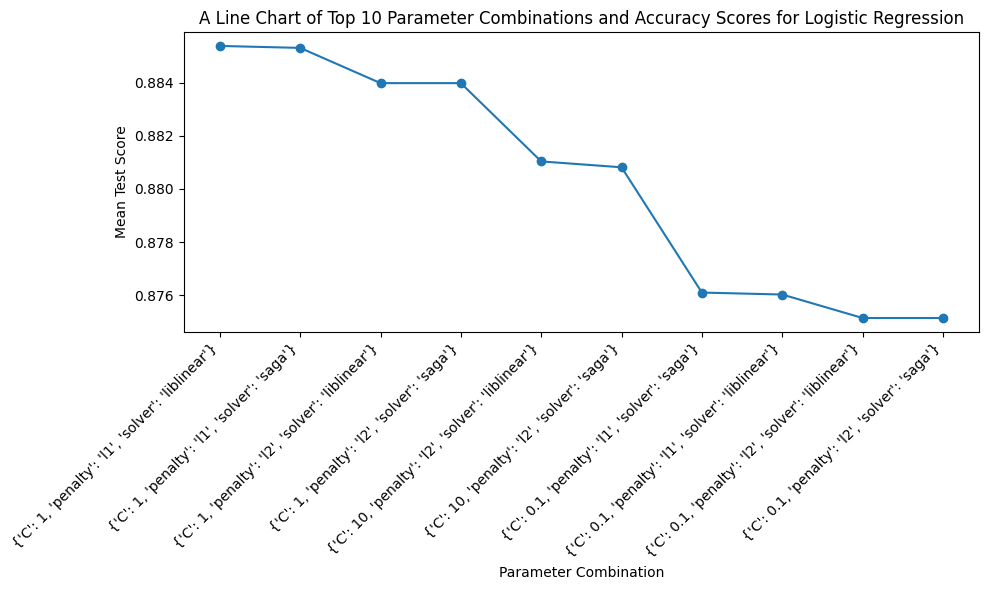

In [ ]:
# Sort by mean_test_score in descending order and select top 10
top_10_df = results_df.sort_values(by=['mean_test_score'], ascending=False).head(10)[['params', 'mean_test_score']]

# Extract parameter combinations and scores for plotting
param_combinations = top_10_df['params'].astype(str).tolist()  # Convert params to strings for plotting
scores = top_10_df['mean_test_score'].tolist()

# Create the line plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(param_combinations, scores, marker='o', linestyle='-')
plt.title('A Line Chart of Top 10 Parameter Combinations and Accuracy Scores for Logistic Regression')
plt.xlabel('Parameter Combination')
plt.ylabel('Mean Test Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

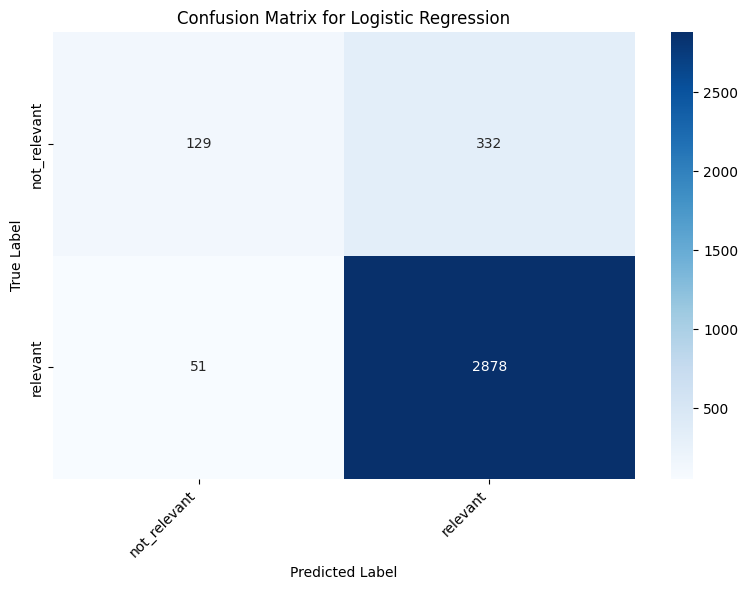

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the test set using the best model
y_pred = best_logistic_regression_model.predict(X_test_tfidf)

# Define the label mapping
label_mapping = ["not_relevant", "relevant"]

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_mapping,
    yticklabels=label_mapping,
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

[link text](https://)

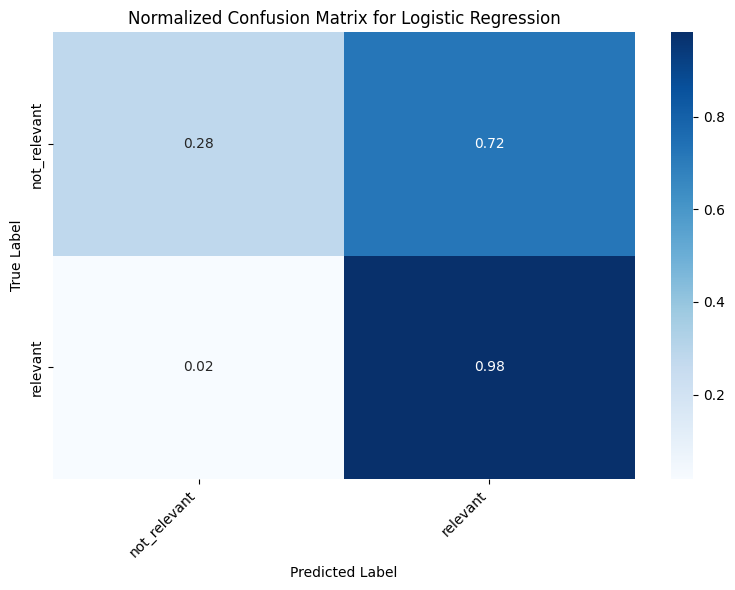

In [ ]:
# Make predictions on the test set using the best model
y_pred = best_logistic_regression_model.predict(X_test_tfidf)

# Define the label mapping
label_mapping = ["not_relevant", "relevant"]

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Normalize confusion matrix
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_normalized,
    annot=True,
    fmt=".2f",  # Format annotations to two decimal places
    cmap="Blues",
    xticklabels=label_mapping,
    yticklabels=label_mapping,
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix for Logistic Regression")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()